In [38]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# 파일 불러오기

df_train = pd.read_csv('D:/data/train.csv')

In [40]:
# 불러온 데이터 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
# 결측치 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# 'Embarked' 열에서 결측치가 있는 행 삭제. df_cleaned 생성
df_cleaned = df_train.dropna(subset=['Embarked'])

In [43]:
# 결측치 재확인
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [44]:
# Embarked와 Pclass의 빈도수 집계
embarked_pclass_counts = df_cleaned.groupby(['Embarked', 'Pclass']).size().unstack()

C:\Users\04-04\AppData\Local\Temp\ipykernel_3084\79589328.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)


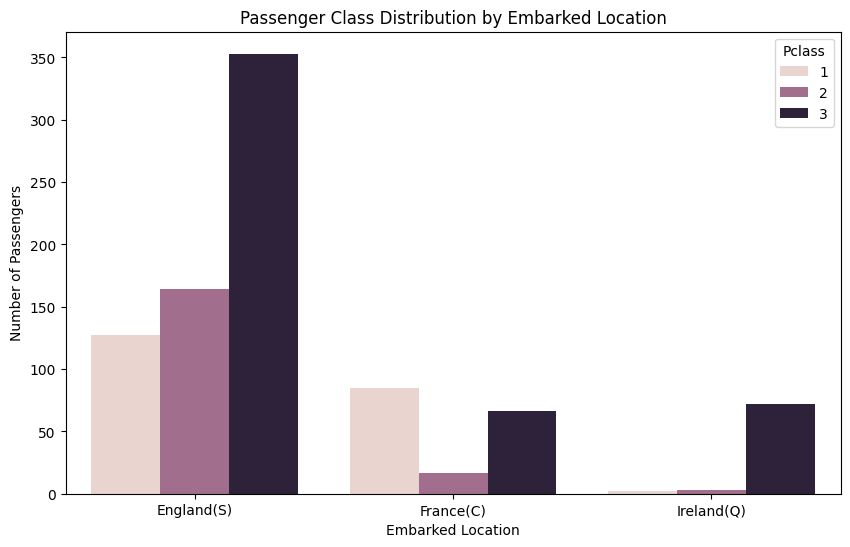

In [51]:
# 값 치환을 위한 딕셔너리 정의
embarked_map = {
    'C': 'France(C)',
    'Q': 'Ireland(Q)',
    'S': 'England(S)'
}

# 임시로 치환된 값을 생성
df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)

# 그래프 생성
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Embarked_temp', hue='Pclass')
plt.title('Passenger Class Distribution by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()


C:\Users\04-04\AppData\Local\Temp\ipykernel_3084\2788649801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)


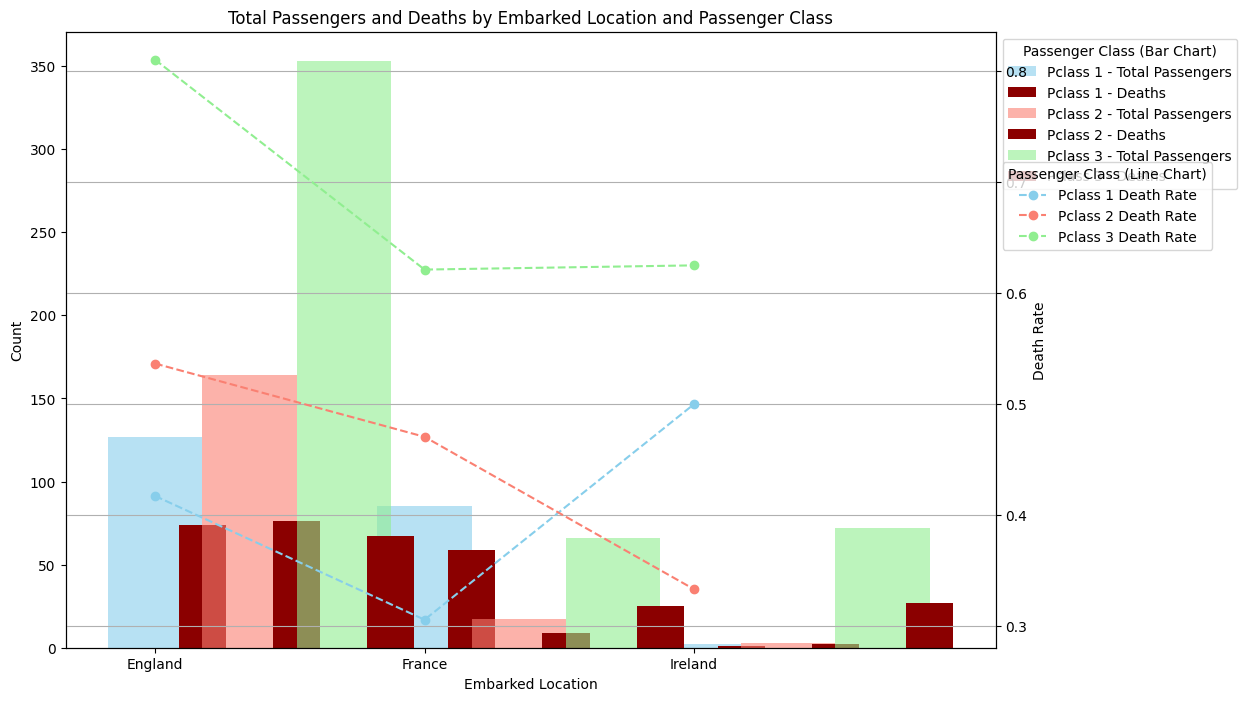

In [63]:
# 임시로 'Embarked' 값을 치환하기 위한 딕셔너리 정의
embarked_map = {
    'C': 'France',
    'Q': 'Ireland',
    'S': 'England'
}

# 'Embarked_temp' 열을 추가하여 임시로 치환된 값을 저장
df_cleaned['Embarked_temp'] = df_cleaned['Embarked'].map(embarked_map)

# 사망률 계산
grouped = df_cleaned.groupby(['Embarked_temp', 'Pclass']).agg(
    total_passengers=('PassengerId', 'size'),
    deaths=('Survived', 'sum')
)
grouped['death_rate'] = 1 - (grouped['deaths'] / grouped['total_passengers'])

# 인덱스를 열로 변환
grouped = grouped.reset_index()

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 8))

# 색상 정의
colors = ['skyblue', 'salmon', 'lightgreen']
pclass_labels = ['Pclass 1', 'Pclass 2', 'Pclass 3']

# 바 차트: 총 탑승자 수와 사망자 수
bar_width = 0.35
for idx, pclass in enumerate(grouped['Pclass'].unique()):
    subset = grouped[grouped['Pclass'] == pclass]
    bar_positions = [i + (idx * bar_width) for i in range(len(subset))]
    ax1.bar(bar_positions, subset['total_passengers'], width=bar_width, color=colors[idx], alpha=0.6, label=f'{pclass_labels[idx]} - Total Passengers')
    ax1.bar([pos + bar_width / 2 for pos in bar_positions], subset['deaths'], width=bar_width / 2, color='darkred', label=f'{pclass_labels[idx]} - Deaths')

# 두 번째 y축을 추가하여 사망률을 표시
ax2 = ax1.twinx()
for idx, pclass in enumerate(grouped['Pclass'].unique()):
    subset = grouped[grouped['Pclass'] == pclass]
    ax2.plot(subset['Embarked_temp'], subset['death_rate'], marker='o', linestyle='--', color=colors[idx], label=f'{pclass_labels[idx]} Death Rate')

# 레이블과 제목 설정
ax1.set_xlabel('Embarked Location')
ax1.set_ylabel('Count')
ax2.set_ylabel('Death Rate')
ax1.set_title('Total Passengers and Deaths by Embarked Location and Passenger Class')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Passenger Class (Bar Chart)')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.8), title='Passenger Class (Line Chart)')

plt.grid(True)
plt.show()
